**Objective**: Train an autoencoder so that it can denoise input images.

# Step-1: Import Functions and Libraries:

In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Input
from keras.optimizers import Adam


print("TensorFlow version:", tf.__version__)


TensorFlow version: 2.15.0


# Step-2: Load and Process the Dataset

In [ ]:
(X_train, _), (X_test, _) = mnist.load_data()
X_train = X_train.astype('float32') / 255.
X_test = X_test.astype('float32') / 255.

X_train_noisy = X_train + 0.25 * np.random.normal(size=X_train.shape)
X_test_noisy = X_test + 0.25 * np.random.normal(size=X_test.shape)
X_train_noisy = np.clip(X_train_noisy, 0., 1.)
X_test_noisy = np.clip(X_test_noisy, 0., 1.)

X_train = X_train.reshape((X_train.shape[0], -1))
X_test = X_test.reshape((X_test.shape[0], -1))
X_train_noisy = X_train_noisy.reshape((X_train_noisy.shape[0], -1))
X_test_noisy = X_test_noisy.reshape((X_test_noisy.shape[0], -1))

11490434/11490434 [==============================] - 1s 0us/step


In [ ]:
print(X_train.shape)

(60000, 784)


# Step-3: Train Your Model:

In [ ]:
input_dim = X_train.shape[1]
encoder_layer1_dim = 128
encoder_layer2_dim = 64
bottleneck_dim = 32
decoder_layer1_dim = encoder_layer2_dim
decoder_layer2_dim = encoder_layer1_dim
output_dim = input_dim
model = Sequential()

# Input layer and first encoder
model.add(Dense(encoder_layer1_dim, activation='relu', input_shape=(input_dim,)))

# Second encoder
model.add(Dense(encoder_layer2_dim, activation='relu'))

# Bottleneck layer
model.add(Dense(bottleneck_dim, activation='relu'))

# First decoder
model.add(Dense(decoder_layer1_dim, activation='relu'))

# Second decoder
model.add(Dense(decoder_layer2_dim, activation='relu'))

# Output layer
model.add(Dense(output_dim, activation='sigmoid'))


model.compile(optimizer='adam', loss='mean_squared_error')
history = model.fit(X_train_noisy, X_train, epochs=50, batch_size=256, shuffle=True, validation_split=0.2)


Epoch 1/50
188/188 [==============================] - 4s 16ms/step - loss: 0.0715 - val_loss: 0.0452
Epoch 2/50
188/188 [==============================] - 3s 14ms/step - loss: 0.0390 - val_loss: 0.0341
Epoch 3/50
188/188 [==============================] - 4s 19ms/step - loss: 0.0316 - val_loss: 0.0291
Epoch 4/50
188/188 [==============================] - 3s 16ms/step - loss: 0.0270 - val_loss: 0.0258
Epoch 5/50
188/188 [==============================] - 3s 14ms/step - loss: 0.0246 - val_loss: 0.0238
Epoch 6/50
188/188 [==============================] - 3s 14ms/step - loss: 0.0230 - val_loss: 0.0225
Epoch 7/50
188/188 [==============================] - 3s 15ms/step - loss: 0.0218 - val_loss: 0.0215
Epoch 8/50
188/188 [==============================] - 4s 19ms/step - loss: 0.0209 - val_loss: 0.0208
Epoch 9/50
188/188 [==============================] - 3s 14ms/step - loss: 0.0202 - val_loss: 0.0202
Epoch 10/50
188/188 [==============================] - 3s 14ms/step - loss: 0.0195 - val_lo

# • Step-4: Model Test:

313/313 [==============================] - 1s 2ms/step


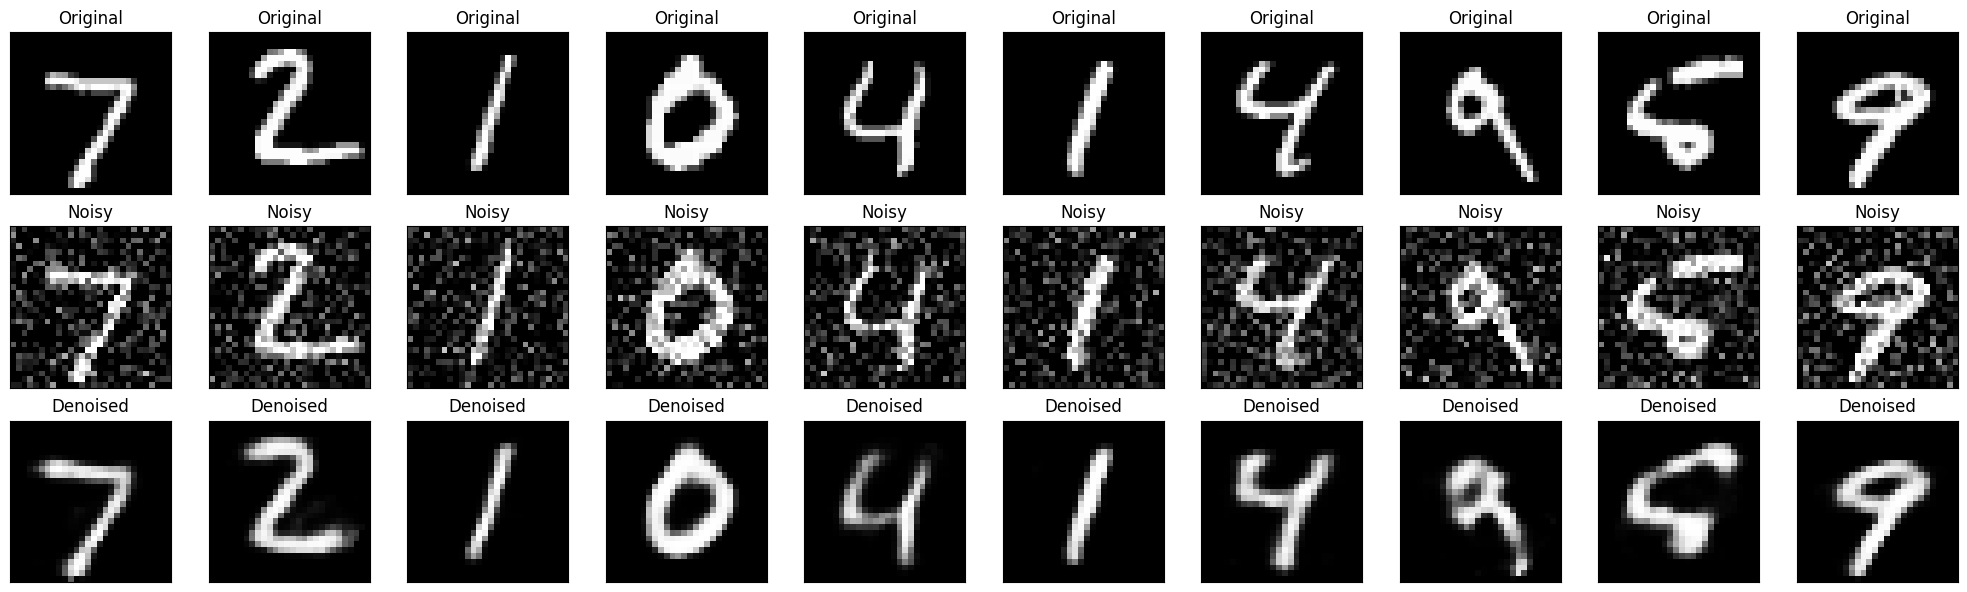

In [ ]:
X_test_denoised = model.predict(X_test_noisy)


n = 10
plt.figure(figsize=(20, 6))
for i in range(n):
    #original
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(X_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    ax.set_title('Original')

    #noisy
    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(X_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    ax.set_title('Noisy')

    #reconstruction
    ax = plt.subplot(3, n, i + 1 + 2 * n)
    plt.imshow(X_test_denoised[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    ax.set_title('Denoised')

plt.tight_layout()
plt.show()


# Observations:

**Original Images**: When generating images for testing, the first row clearly shows the original MNIST digits. The digits are crisp and distinct against a clean background.

**Noisy Images**: The second row shows the noisy versions of these digits, where random Gaussian noise has been added to the original images. This artificially induced noise significantly obscures the digits, simulating real-world scenarios where data may be corrupted by various forms of noise.

**Denoised Images**: The third row presents the output from the autoencoder, which are the denoised images. It's evident that the model has effectively reduced the noise, as the denoised images have less visual noise compared to the noisy inputs.

**Model Performance**: The autoencoder has learned to extract and retain important features while discarding the noise. The performance denoised images maintain the structural integrity of the digits. Although the denoised images are not as sharp as the original images, the model has done a good job in cleaning up the noise. Any loss of detail in the denoised images could be an area for further improvement, possibly by tweaking the training parameters.

**Conclusion**: Overall, the autoencoder performs effectively as a denoising tool as it improves the clarity of various digit representations despite the presence of significant noise.